## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker


__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [ ]:
a = np.load("average_ratings.npy")
print(a[0])
dates = pd.date_range(start = "01.01.2019", end = "30.12.2021")
dates

[5.         5.01310274 5.02623981 ... 5.52281922 5.53729203 5.52281922]


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Parsing '30.12.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq='D')

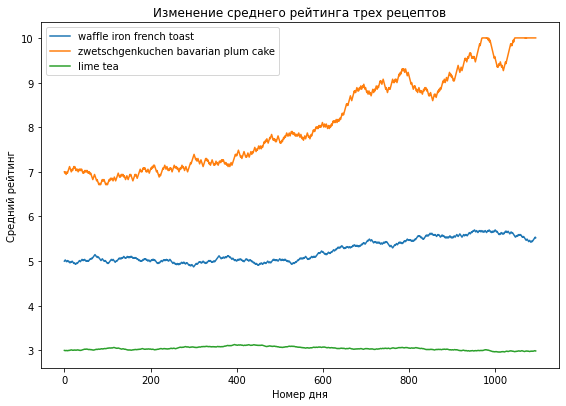

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
gr1, = ax.plot(a[0], label = "waffle iron french toast")
gr2, = ax.plot(a[1], label = "zwetschgenkuchen bavarian plum cake")
gr3, = ax.plot(a[2], label = "lime tea")
ax.legend(handles=[gr1,gr2,gr3])
ax.set_xlabel("Номер дня")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга 3-х рецептов")
fig.show()

<ipython-input-22-44a3fc58420c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dates)


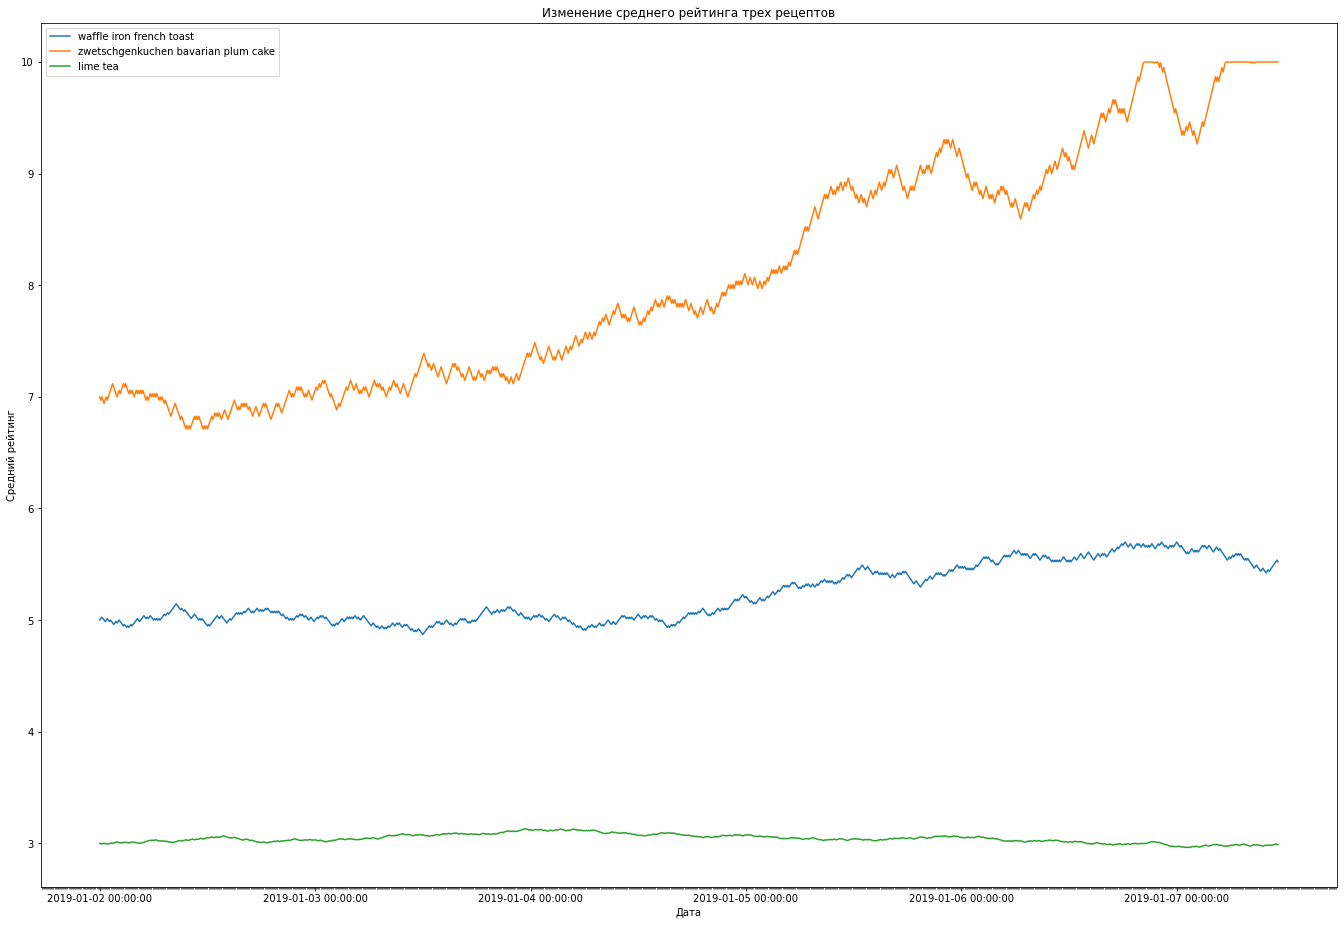

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
gr1, = ax.plot(a[0], label = "waffle iron french toast")
gr2, = ax.plot(a[1], label = "zwetschgenkuchen bavarian plum cake")
gr3, = ax.plot(a[2], label = "lime tea")
ax.legend(handles=[gr1,gr2,gr3])
ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.set_xticklabels(dates)
ax.xaxis.set_minor_locator(ticker.MultipleLocator())
fig.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


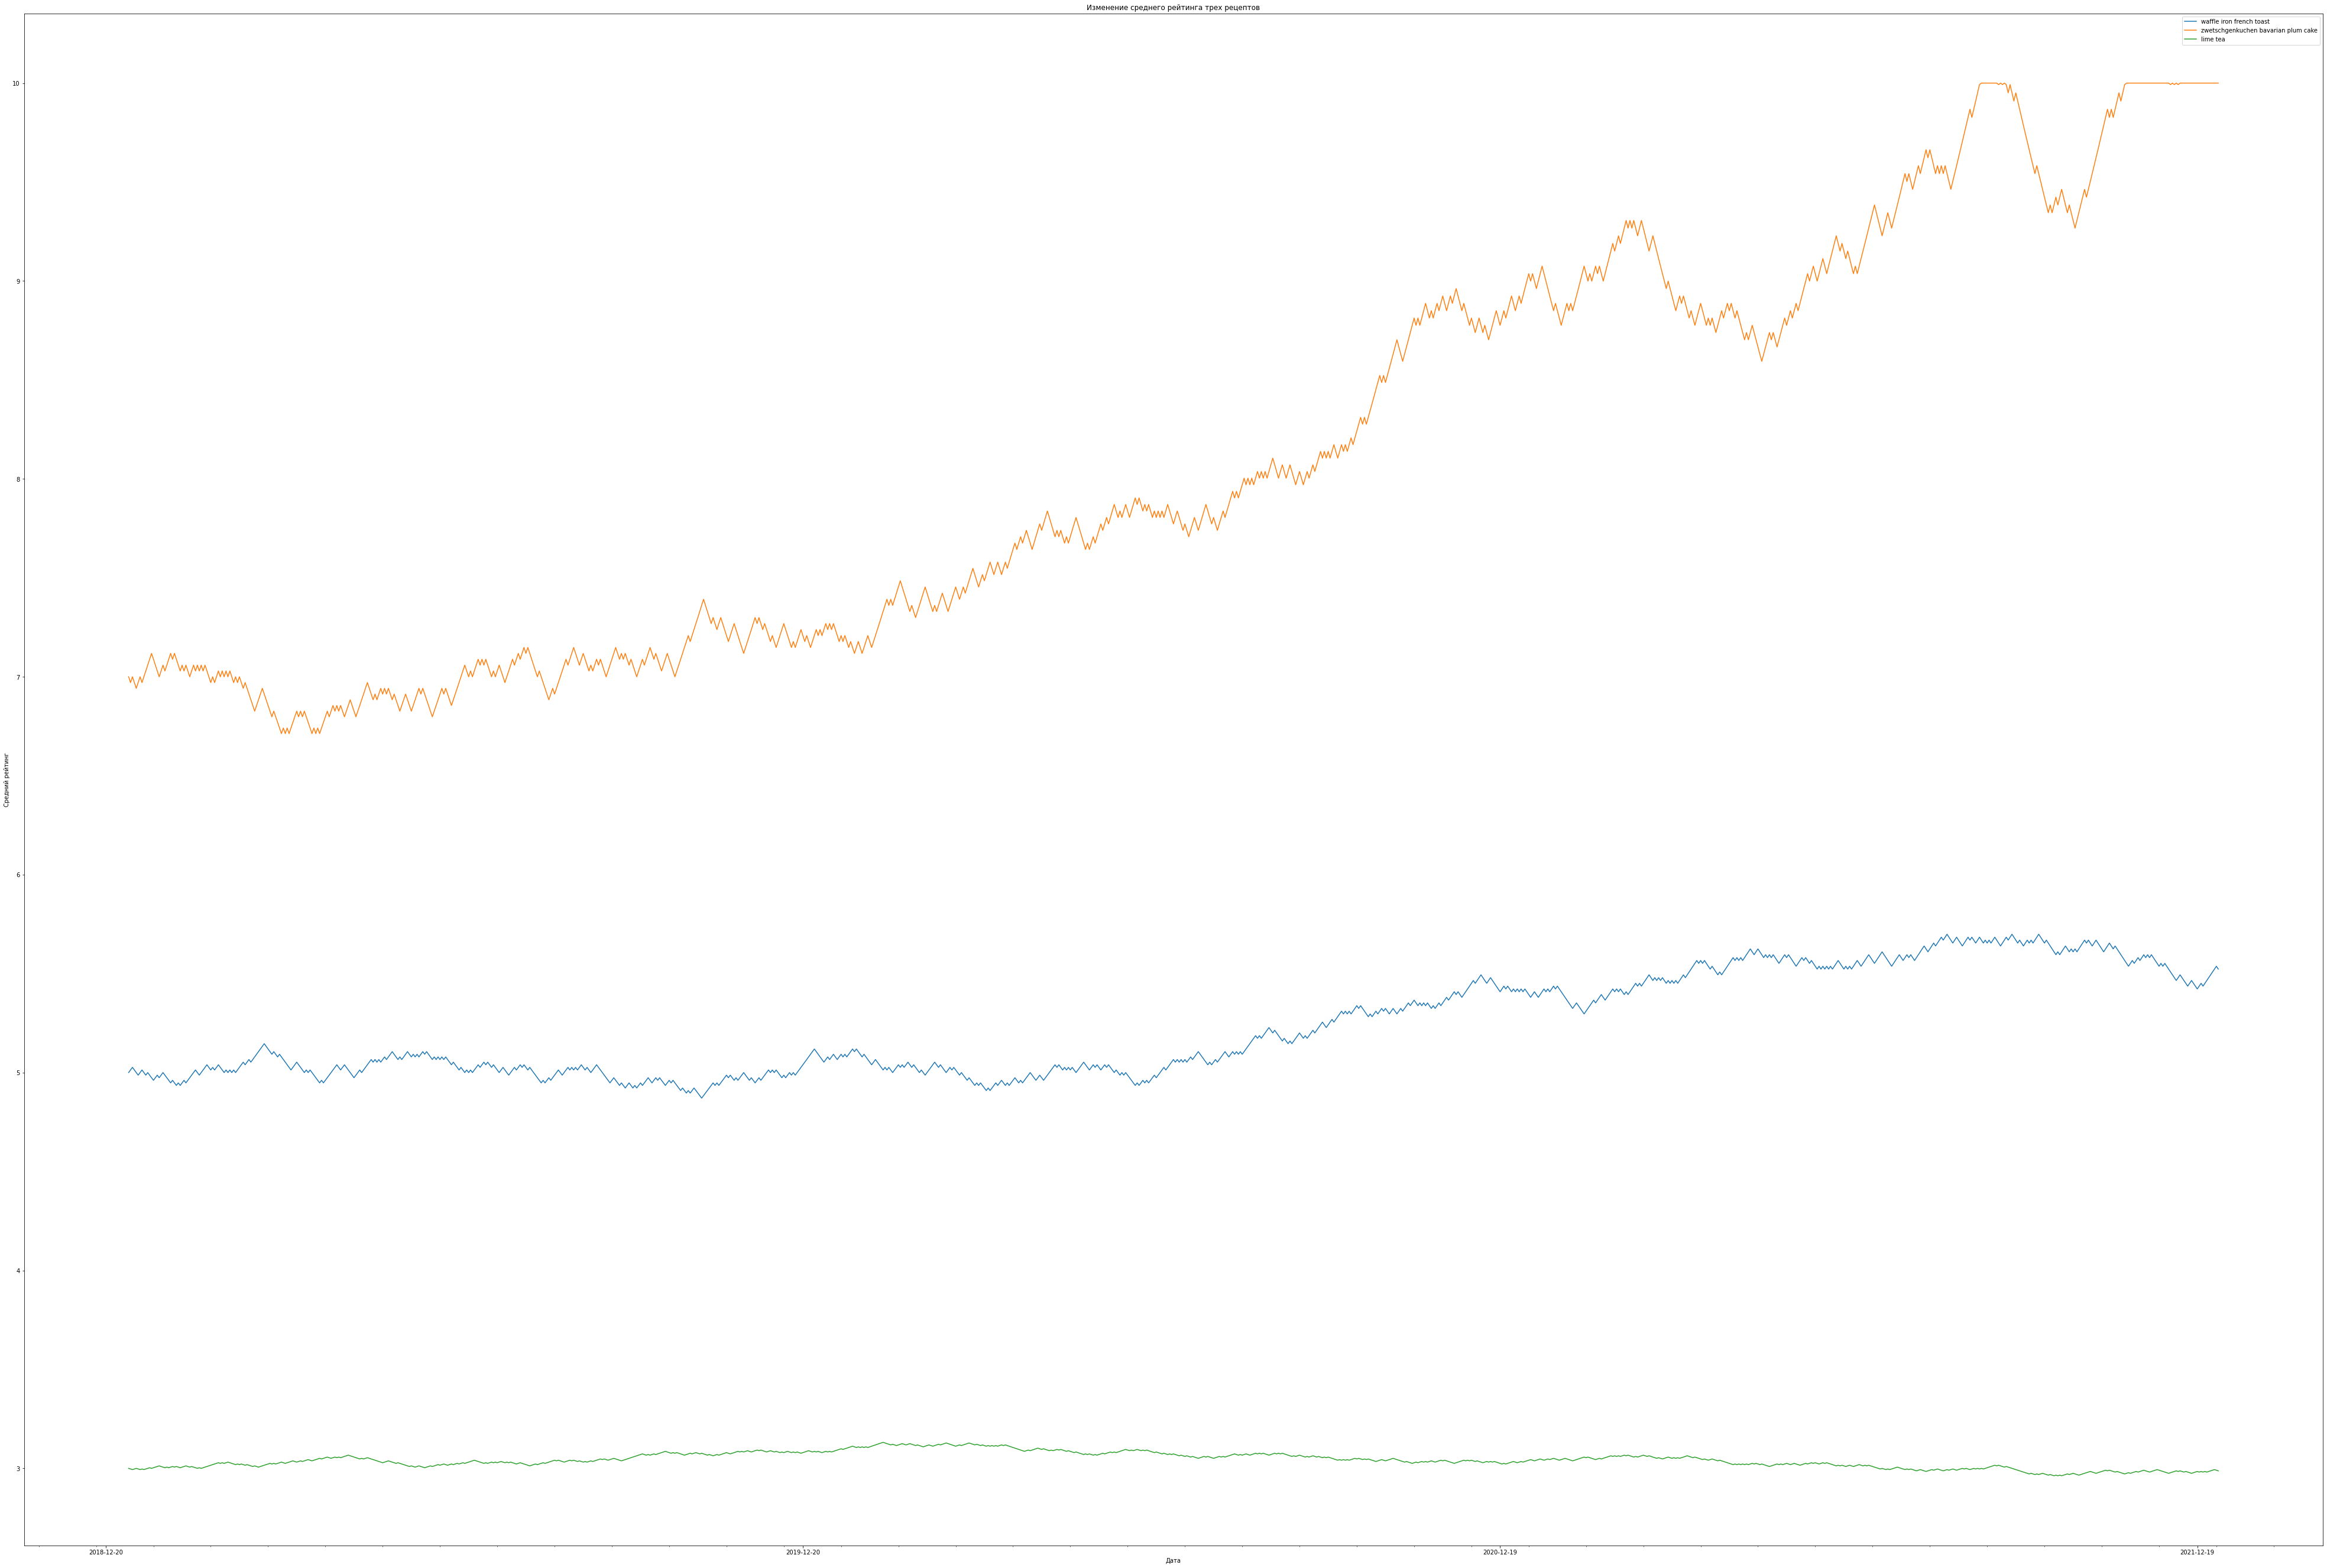

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,9,9])
gr1, = ax.plot(list(dates),a[0], label = "waffle iron french toast")
gr2, = ax.plot(list(dates),a[1], label = "zwetschgenkuchen bavarian plum cake")
gr3, = ax.plot(list(dates),a[2], label = "lime tea")
ax.legend(handles=[gr1,gr2,gr3])
ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.xaxis.set_major_locator(ticker.MultipleLocator(365))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(30))
fig.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

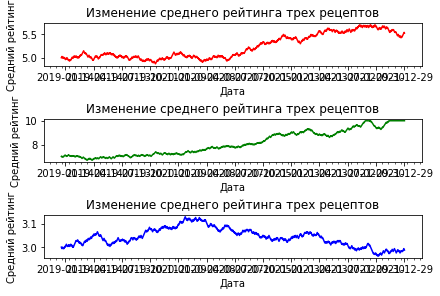

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, layout="constrained")
ax[0].plot(list(dates),list(a[0]), "r", label = "waffle iron french toast")
ax[1].plot(list(dates),a[1], "g", label = "zwetschgenkuchen bavarian plum cake")
ax[2].plot(list(dates),a[2], "b", label = "lime tea")
for i in range(3):
  ax[i].set_xlabel("Дата")
  ax[i].set_ylabel("Средний рейтинг")
  ax[i].set_title("Изменение среднего рейтинга трех рецептов")
  ax[i].xaxis.set_major_locator(ticker.MultipleLocator(90))
  ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(20))

# ax2.set_xlabel("Дата")
# ax2.set_ylabel("Средний рейтинг")
# ax2.set_title("Изменение среднего рейтинга трех рецептов")
# ax2.xaxis.set_major_locator(ticker.MultipleLocator(90))
# ax2.xaxis.set_minor_locator(ticker.MultipleLocator())

# ax3.set_xlabel("Дата")
# ax3.set_ylabel("Средний рейтинг")
# ax3.set_title("Изменение среднего рейтинга трех рецептов")
# ax3.xaxis.set_major_locator(ticker.MultipleLocator(90))
# ax3.xaxis.set_minor_locator(ticker.MultipleLocator())

In [ ]:
b = np.load("visitors.npy")
b

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2], dtype=int32)

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


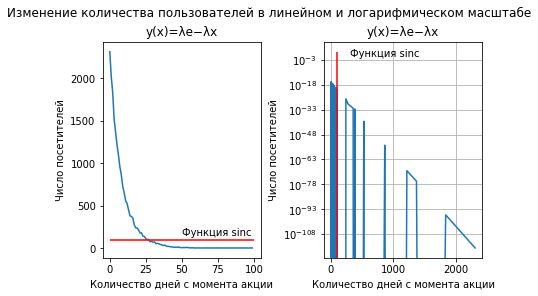

In [ ]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, layout="constrained")
plt.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе")
ax[0].plot(b)
ax[0].set_title("y(x)=λe−λx")

ax[0].hlines(100, 0, 100, color = 'r')
ax[0].text(50, 150,  'Функция sinc')
ax[0].set_xlabel("Количество дней с момента акции")
ax[0].set_ylabel("Число посетителей")

 
x = b
ax[1].semilogy(x, np.sinc(x) * np.exp( -np.abs(x/10)) )
ax[1].grid()
ax[1].set_title("y(x)=λe−λx") 
ax[1].vlines(100, 0, 100, color = 'r')
ax[1].text(300, 0.1,  'Функция sinc')
ax[1].set_xlabel("Количество дней с момента акции")
ax[1].set_ylabel("Число посетителей")
plt.show()

In [ ]:
print(ax[0])

Axes(0.114005,0.118056;0.366789x0.749671)


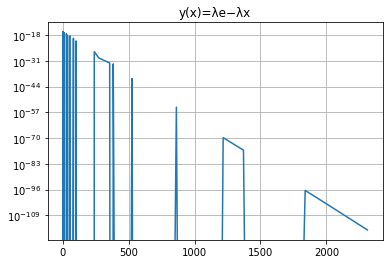

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
 
x = b
ax.semilogy(x, np.sinc(x) * np.exp( -np.abs(x/10)) )
ax.grid()
ax.set_title("y(x)=λe−λx") 
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
reviews = ...
recipes = ...

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
a = pd.read_csv('recipes_sample.csv')
b = pd.read_csv('reviews_sample.csv')
fig = plt.figure(figsize=(10,5))
a1 = a[a["minutes"]<5]
a2 = a[(a["minutes"]<50)&(a["minutes"]>=5)]
a3 = a[a["minutes"]>50]
meow_recipes = {"data1":["меньше 5","средние","долгие"],"data2":[a1["n_steps"].sum(axis=0) / a1["n_steps"].shape[0],
                                                                  a2["n_steps"].sum(axis=0) / a2["n_steps"].shape[0],
                                                                  a3["n_steps"].sum(axis=0) / a3["n_steps"].shape[0]],
                "data3":[a1["n_steps"].shape[0],a2["n_steps"].shape[0],a3["n_steps"].shape[0]]}
meow_recipes = pd.DataFrame(meow_recipes, index = ["меньше 5","средние","долгие"])
ax1 = fig.add_subplot(1,2,1)
meow_recipes.plot(ax = ax1, x = "data1", y = "data2", kind = "bar", xlabel = "Группа рецептов", ylabel="Средняя длительность")
ax2 = fig.add_subplot(1,2,2)
meow_recipes["data3"].plot(ax=ax2, kind="pie", title = "Размеры групп рецептов", ylabel="")

ParserError: ignored

In [ ]:
meow_recipes


NameError: ignored

In [ ]:
b

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2], dtype=int32)

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [ ]:
fig = plt.figure(figsize=(10,5))
date08 = b[(b['date'] >= "2008-01-01") & (b['date'] <= "2008-12-31")]
date09 = b[(b['date'] >= "2009-01-01") & (b['date'] <= "2009-12-31")]
ax1 = fig.add_subplot(1,2,1)
plt.title("2008")
date08["rating"].hist(ax = ax1)
ax2 = fig.add_subplot(1,2,2)
date09["rating"].hist(ax = ax2)

plt.title("2009")
plt.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")

IndexError: ignored

<Figure size 720x360 with 0 Axes>

### Визуализация данных при помощи пакета `seaborn`

In [ ]:
import seaborn as sns

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

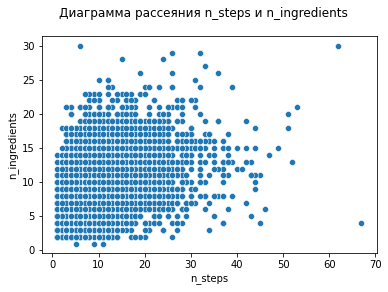

In [ ]:
sns.scatterplot(data = a, x = "n_steps", y = "n_ingredients") 
# sns.scatterplot(data = a, x = "n_steps", y = "n_ingredients", hue = a1["n_steps"]) 
# sns.scatterplot(data = a, x = "n_steps", y = "n_ingredients", hue = a2["n_steps"]) 
# sns.scatterplot(data = a, x = "n_steps", y = "n_ingredients", hue = a3["n_steps"]) 
plt.suptitle("Диаграмма рассеяния n_steps и n_ingredients")
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [ ]:
rate = pd.DataFrame( b["rating"])
reci = a[["minutes","n_steps","n_ingredients"]]. copy ()
korr = reci.join(rate).corr()
sns.heatmap(korr, annot = True, cmap = "YlOrRd")
plt.suptitle("Корреляционная матрица числовых столбцов таблиц recipes и reviews")


IndexError: ignored